In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [ ]:
train_data.shape

(58980, 12)

In [ ]:
test_data.shape

(28938, 12)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58980 entries, 0 to 58979
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            58980 non-null  object 
 1   Summary                   58980 non-null  object 
 2   Precip Type               58849 non-null  object 
 3   Temperature (C)           58979 non-null  float64
 4   Apparent Temperature (C)  58979 non-null  float64
 5   Humidity                  58979 non-null  float64
 6   Wind Speed (km/h)         58979 non-null  float64
 7   Wind Bearing (degrees)    58979 non-null  float64
 8   Visibility (km)           58979 non-null  float64
 9   Loud Cover                58979 non-null  float64
 10  Pressure (millibars)      58979 non-null  float64
 11  Daily Summary             58979 non-null  object 
dtypes: float64(8), object(4)
memory usage: 5.4+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28938 entries, 0 to 28937
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            28938 non-null  object 
 1   Summary                   28938 non-null  object 
 2   Precip Type               28564 non-null  object 
 3   Temperature (C)           28938 non-null  float64
 4   Apparent Temperature (C)  28938 non-null  float64
 5   Humidity                  28938 non-null  float64
 6   Wind Speed (km/h)         28938 non-null  float64
 7   Wind Bearing (degrees)    28938 non-null  int64  
 8   Visibility (km)           28938 non-null  float64
 9   Loud Cover                28938 non-null  int64  
 10  Pressure (millibars)      28938 non-null  float64
 11  Daily Summary             28938 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 2.6+ MB


In [ ]:
train_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 131
Temperature (C)               1
Apparent Temperature (C)      1
Humidity                      1
Wind Speed (km/h)             1
Wind Bearing (degrees)        1
Visibility (km)               1
Loud Cover                    1
Pressure (millibars)          1
Daily Summary                 1
dtype: int64

In [ ]:
test_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 374
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
train_data['Precip Type']=train_data['Precip Type'].fillna(train_data['Precip Type'].mode().iloc[0])
train_data['Temperature (C)']=train_data['Temperature (C)'].fillna(train_data['Temperature (C)'].mean())
train_data['Apparent Temperature (C)']=train_data['Apparent Temperature (C)'].fillna(train_data['Apparent Temperature (C)'].mean())
train_data['Humidity']=train_data['Humidity'].fillna(train_data['Humidity'].mean())
train_data['Wind Speed (km/h)']=train_data['Wind Speed (km/h)'].fillna(train_data['Wind Speed (km/h)'].mean())
train_data['Wind Bearing (degrees)']=train_data['Wind Bearing (degrees)'].fillna(train_data['Wind Bearing (degrees)'].mean())
train_data['Visibility (km)']=train_data['Visibility (km)'].fillna(train_data['Visibility (km)'].mean())
train_data['Loud Cover']=train_data['Loud Cover'].fillna(train_data['Loud Cover'].mean())
train_data['Pressure (millibars)']=train_data['Pressure (millibars)'].fillna(train_data['Pressure (millibars)'].mean())
train_data['Daily Summary']=train_data['Daily Summary'].fillna(train_data['Daily Summary'].mode().iloc[0])

test_data['Precip Type']=test_data['Precip Type'].fillna(test_data['Precip Type'].mode().iloc[0])

In [ ]:
train_data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [ ]:
test_data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [ ]:
train_data.drop('Formatted Date',axis=1,inplace=True)
test_data.drop('Formatted Date',axis=1,inplace=True)

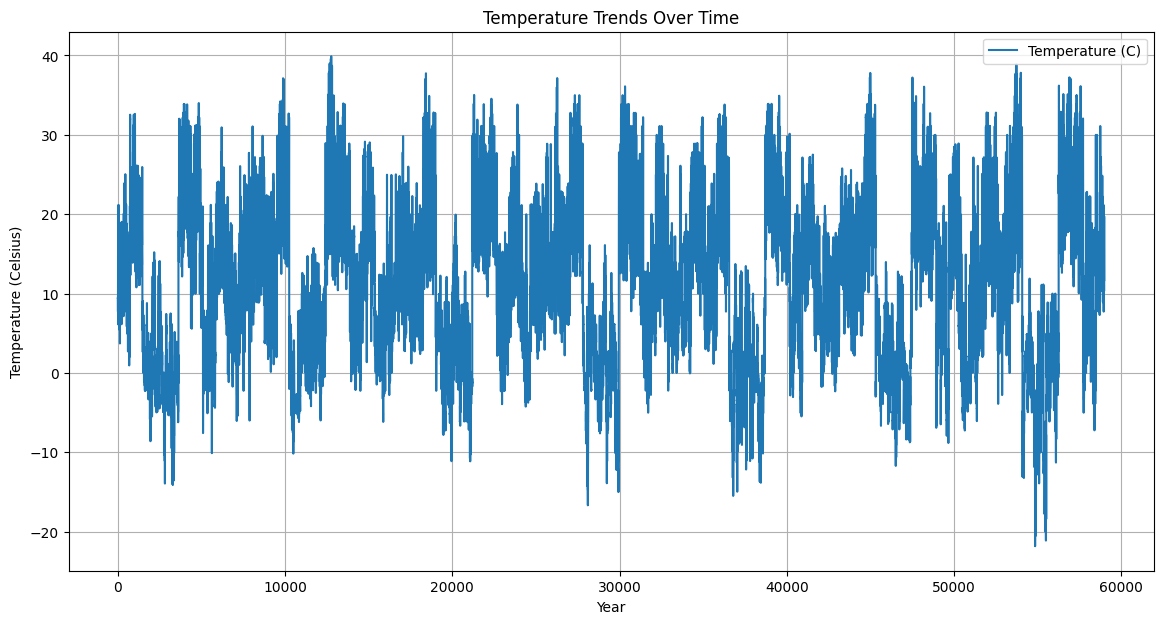

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(train_data['Temperature (C)'], label='Temperature (C)')
plt.title('Temperature Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
variables=['Summary','Precip Type','Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)',
           'Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)','Daily Summary']

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

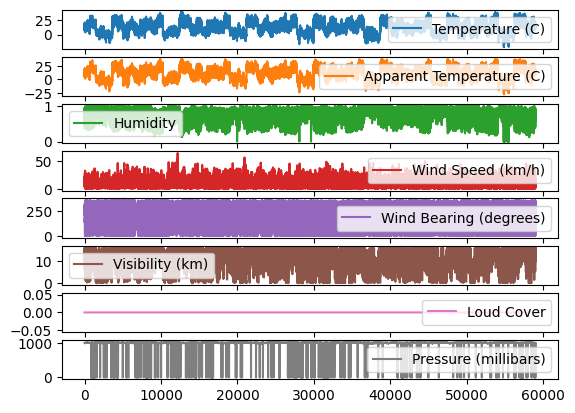

In [ ]:
train_data[['Summary','Precip Type','Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)',
           'Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)','Daily Summary']].plot(subplots=True)

<Axes: ylabel='Temperature (C)'>

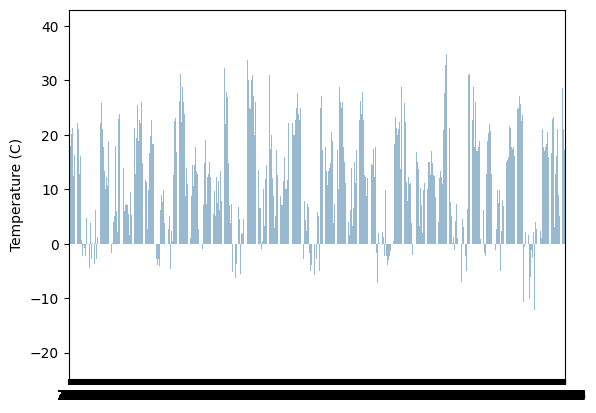

In [ ]:
import seaborn as sns
sns.barplot(train_data['Temperature (C)'], alpha=0.5)

In [ ]:
label_encoder = LabelEncoder()
train_data['Summary'] = label_encoder.fit_transform(train_data['Summary'])
train_data['Precip Type'] = label_encoder.fit_transform(train_data['Precip Type'])
train_data['Daily Summary'] = label_encoder.fit_transform(train_data['Daily Summary'])

In [ ]:
label_encoder = LabelEncoder()
test_data['Summary'] = label_encoder.fit_transform(test_data['Summary'])
test_data['Precip Type'] = label_encoder.fit_transform(test_data['Precip Type'])
test_data['Daily Summary'] = label_encoder.fit_transform(test_data['Daily Summary'])

In [ ]:
x_train = train_data.drop(columns=['Temperature (C)'])
y_train = train_data['Temperature (C)']

In [ ]:
x_test = test_data.drop(columns=['Temperature (C)'])
y_test = test_data['Temperature (C)']

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Reshape input features for LSTM
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=100,shuffle=False)


Epoch 1/100
590/590 [==============================] - 6s 4ms/step - loss: 97.7775
Epoch 2/100
590/590 [==============================] - 2s 4ms/step - loss: 38.3335
Epoch 3/100
590/590 [==============================] - 3s 5ms/step - loss: 15.2880
Epoch 4/100
590/590 [==============================] - 3s 4ms/step - loss: 8.7667
Epoch 5/100
590/590 [==============================] - 2s 4ms/step - loss: 6.3160
Epoch 6/100
590/590 [==============================] - 2s 4ms/step - loss: 4.8044
Epoch 7/100
590/590 [==============================] - 2s 4ms/step - loss: 3.7623
Epoch 8/100
590/590 [==============================] - 2s 4ms/step - loss: 2.9801
Epoch 9/100
590/590 [==============================] - 3s 5ms/step - loss: 2.2049
Epoch 10/100
590/590 [==============================] - 2s 4ms/step - loss: 1.5850
Epoch 11/100
590/590 [==============================] - 2s 4ms/step - loss: 1.1989
Epoch 12/100
590/590 [==============================] - 2s 4ms/step - loss: 0.9322
Epoch 13/1

In [ ]:
# Evaluate model
train_loss = model.evaluate(x_train, y_train)
test_loss = model.evaluate(x_test, y_test)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

905/905 [==============================] - 2s 3ms/step - loss: 0.0773
Train Loss: 0.1119
Test Loss: 0.0773


In [ ]:
# Make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

905/905 [==============================] - 3s 3ms/step


In [ ]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, train_predict)
test_r2 = r2_score(y_test, test_predict)

print(f'Train R^2 score: {train_r2:.4f}')
print(f'Test R^2 score: {test_r2:.4f}')

Train R^2 score: 0.9989
Test R^2 score: 0.9990


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 50)             12200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 32451 (126.76 KB)
Trainable params: 32451 (126.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
